In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gym
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

Using TensorFlow backend.


## Set Environment

In [3]:
ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME).unwrapped; env.seed(90);

nb_actions = env.action_space.n

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [4]:
print('Environment Display:')
env.reset() # reset environment to a new, random state
env.render()

print('State space {}'.format(env.observation_space))
print('Action space {}'.format(env.action_space))

Environment Display:
State space Box(4,)
Action space Discrete(2)


## Build DQN Architecture

In [5]:
model = Sequential()

In [6]:
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


## Set Configs

In [7]:
MEMORY_LIMIT = 50000
WINDOW_LENGTH = 1
MODEL_UPDATE = 1e-2
NB_WARMUP = 10
NB_STEPS = 5000
LR = 1e-3
LOSS = 'mae'

## Set Memory, Policy & Init DQN

In [8]:
memory = SequentialMemory(limit=MEMORY_LIMIT, window_length=WINDOW_LENGTH)

In [9]:
policy = EpsGreedyQPolicy()

In [10]:
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, policy=policy, 
               nb_steps_warmup=NB_WARMUP, target_model_update=MODEL_UPDATE)

## Set Optimizer

In [11]:
dqn.compile(Adam(lr=LR), metrics=[LOSS])

## Train DQN

In [12]:
history = dqn.fit(env, nb_steps=NB_STEPS, visualize=True, verbose=2)

Training for 5000 steps ...
    9/5000: episode: 1, duration: 0.214s, episode steps: 9, steps per second: 42, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.000 [0.000, 0.000], mean observation: 0.142 [-1.802, 2.874], loss: --, mean_absolute_error: --, mean_q: --
   18/5000: episode: 2, duration: 0.599s, episode steps: 9, steps per second: 15, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.000 [0.000, 0.000], mean observation: 0.119 [-1.755, 2.741], loss: 0.543079, mean_absolute_error: 0.839125, mean_q: 0.464855
   30/5000: episode: 3, duration: 0.066s, episode steps: 12, steps per second: 181, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.083 [0.000, 1.000], mean observation: 0.103 [-1.975, 3.030], loss: 0.495114, mean_absolute_error: 0.831914, mean_q: 0.538446
   39/5000: episode: 4, duration: 0.050s, episode steps: 9, steps per second: 179, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean a

  303/5000: episode: 31, duration: 0.056s, episode steps: 10, steps per second: 180, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.000 [0.000, 0.000], mean observation: 0.147 [-1.935, 3.077], loss: 0.223558, mean_absolute_error: 1.007768, mean_q: 2.633713
  314/5000: episode: 32, duration: 0.068s, episode steps: 11, steps per second: 161, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.091 [0.000, 1.000], mean observation: 0.122 [-1.736, 2.736], loss: 0.208995, mean_absolute_error: 1.026046, mean_q: 2.659080
  326/5000: episode: 33, duration: 0.093s, episode steps: 12, steps per second: 128, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.083 [0.000, 1.000], mean observation: 0.084 [-2.004, 3.043], loss: 0.301327, mean_absolute_error: 1.114365, mean_q: 2.696966
  336/5000: episode: 34, duration: 0.081s, episode steps: 10, steps per second: 124, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean

  629/5000: episode: 63, duration: 0.048s, episode steps: 9, steps per second: 187, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.111 [0.000, 1.000], mean observation: 0.129 [-1.563, 2.450], loss: 0.176096, mean_absolute_error: 1.969663, mean_q: 4.181559
  638/5000: episode: 64, duration: 0.051s, episode steps: 9, steps per second: 177, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.111 [0.000, 1.000], mean observation: 0.147 [-1.565, 2.505], loss: 0.228695, mean_absolute_error: 1.999659, mean_q: 4.207668
  649/5000: episode: 65, duration: 0.058s, episode steps: 11, steps per second: 189, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.182 [0.000, 1.000], mean observation: 0.134 [-1.567, 2.481], loss: 0.160468, mean_absolute_error: 1.976828, mean_q: 4.212317
  660/5000: episode: 66, duration: 0.058s, episode steps: 11, steps per second: 191, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean act

  910/5000: episode: 92, duration: 0.047s, episode steps: 8, steps per second: 170, episode reward: 8.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.125 [0.000, 1.000], mean observation: 0.139 [-1.406, 2.258], loss: 0.108146, mean_absolute_error: 2.476599, mean_q: 4.998950
  920/5000: episode: 93, duration: 0.051s, episode steps: 10, steps per second: 195, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.100 [0.000, 1.000], mean observation: 0.094 [-1.801, 2.643], loss: 0.099124, mean_absolute_error: 2.521772, mean_q: 5.110631
  930/5000: episode: 94, duration: 0.051s, episode steps: 10, steps per second: 195, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.100 [0.000, 1.000], mean observation: 0.143 [-1.724, 2.717], loss: 0.126879, mean_absolute_error: 2.494609, mean_q: 5.034311
  941/5000: episode: 95, duration: 0.056s, episode steps: 11, steps per second: 197, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean a

 1272/5000: episode: 122, duration: 0.131s, episode steps: 15, steps per second: 114, episode reward: 15.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.533 [0.000, 1.000], mean observation: 0.090 [-0.784, 1.194], loss: 1.051814, mean_absolute_error: 3.343407, mean_q: 6.300366
 1291/5000: episode: 123, duration: 0.182s, episode steps: 19, steps per second: 104, episode reward: 19.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.526 [0.000, 1.000], mean observation: 0.065 [-1.020, 1.423], loss: 0.286842, mean_absolute_error: 3.255180, mean_q: 6.244413
 1346/5000: episode: 124, duration: 0.343s, episode steps: 55, steps per second: 160, episode reward: 55.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.582 [0.000, 1.000], mean observation: 0.211 [-0.592, 1.636], loss: 0.736958, mean_absolute_error: 3.418966, mean_q: 6.463250
 1429/5000: episode: 125, duration: 0.432s, episode steps: 83, steps per second: 192, episode reward: 83.000, mean reward: 1.000 [1.000, 1.000], 

 1915/5000: episode: 152, duration: 0.108s, episode steps: 10, steps per second: 93, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.700 [0.000, 1.000], mean observation: -0.108 [-1.487, 0.818], loss: 2.257081, mean_absolute_error: 5.527555, mean_q: 10.185092
 1931/5000: episode: 153, duration: 0.144s, episode steps: 16, steps per second: 111, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.562 [0.000, 1.000], mean observation: -0.104 [-1.187, 0.578], loss: 2.523775, mean_absolute_error: 5.388201, mean_q: 9.974365
 1942/5000: episode: 154, duration: 0.068s, episode steps: 11, steps per second: 162, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.727 [0.000, 1.000], mean observation: -0.101 [-1.934, 1.210], loss: 2.064177, mean_absolute_error: 5.347342, mean_q: 10.000385
 1952/5000: episode: 155, duration: 0.055s, episode steps: 10, steps per second: 183, episode reward: 10.000, mean reward: 1.000 [1.000, 1.00

 2211/5000: episode: 182, duration: 0.074s, episode steps: 10, steps per second: 136, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.134 [-2.972, 1.913], loss: 2.114795, mean_absolute_error: 6.184721, mean_q: 11.606050
 2220/5000: episode: 183, duration: 0.065s, episode steps: 9, steps per second: 138, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.129 [-2.734, 1.742], loss: 4.876651, mean_absolute_error: 6.431284, mean_q: 11.797325
 2228/5000: episode: 184, duration: 0.049s, episode steps: 8, steps per second: 163, episode reward: 8.000, mean reward: 1.000 [1.000, 1.000], mean action: 1.000 [1.000, 1.000], mean observation: -0.162 [-2.587, 1.548], loss: 4.274918, mean_absolute_error: 6.449813, mean_q: 11.891754
 2237/5000: episode: 185, duration: 0.057s, episode steps: 9, steps per second: 159, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], 

 2525/5000: episode: 212, duration: 0.088s, episode steps: 11, steps per second: 126, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.818 [0.000, 1.000], mean observation: -0.115 [-2.154, 1.338], loss: 3.598913, mean_absolute_error: 6.624563, mean_q: 12.062018
 2534/5000: episode: 213, duration: 0.084s, episode steps: 9, steps per second: 107, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.889 [0.000, 1.000], mean observation: -0.148 [-2.236, 1.364], loss: 3.587668, mean_absolute_error: 6.576097, mean_q: 11.975159
 2545/5000: episode: 214, duration: 0.075s, episode steps: 11, steps per second: 147, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.818 [0.000, 1.000], mean observation: -0.134 [-2.248, 1.357], loss: 2.874215, mean_absolute_error: 6.541881, mean_q: 12.021461
 2556/5000: episode: 215, duration: 0.062s, episode steps: 11, steps per second: 177, episode reward: 11.000, mean reward: 1.000 [1.000, 1.00

 2899/5000: episode: 242, duration: 0.118s, episode steps: 16, steps per second: 136, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.562 [0.000, 1.000], mean observation: -0.092 [-1.086, 0.446], loss: 3.687540, mean_absolute_error: 6.603423, mean_q: 11.977713
 2917/5000: episode: 243, duration: 0.094s, episode steps: 18, steps per second: 191, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.556 [0.000, 1.000], mean observation: -0.065 [-1.202, 0.635], loss: 3.221349, mean_absolute_error: 6.517032, mean_q: 11.877217
 2943/5000: episode: 244, duration: 0.142s, episode steps: 26, steps per second: 183, episode reward: 26.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.538 [0.000, 1.000], mean observation: -0.065 [-1.046, 0.560], loss: 3.671613, mean_absolute_error: 6.567753, mean_q: 11.895388
 2960/5000: episode: 245, duration: 0.091s, episode steps: 17, steps per second: 187, episode reward: 17.000, mean reward: 1.000 [1.000, 1.

 3934/5000: episode: 272, duration: 0.424s, episode steps: 42, steps per second: 99, episode reward: 42.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.476 [0.000, 1.000], mean observation: -0.093 [-0.734, 0.393], loss: 2.656617, mean_absolute_error: 7.399725, mean_q: 13.867351
 3967/5000: episode: 273, duration: 0.243s, episode steps: 33, steps per second: 136, episode reward: 33.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.485 [0.000, 1.000], mean observation: -0.131 [-0.807, 0.172], loss: 3.119757, mean_absolute_error: 7.512783, mean_q: 14.037930
 4020/5000: episode: 274, duration: 0.350s, episode steps: 53, steps per second: 152, episode reward: 53.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.509 [0.000, 1.000], mean observation: -0.031 [-1.061, 0.390], loss: 3.568189, mean_absolute_error: 7.499327, mean_q: 13.872531
 4036/5000: episode: 275, duration: 0.110s, episode steps: 16, steps per second: 145, episode reward: 16.000, mean reward: 1.000 [1.000, 1.0

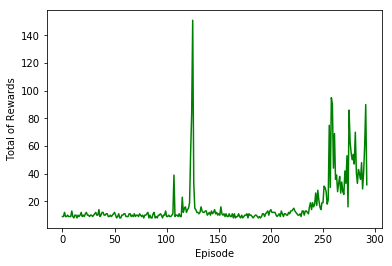

In [13]:
plt.plot(history.history['episode_reward'], color='green')
plt.xlabel('Episode')
plt.ylabel('Total of Rewards')
plt.show()

## Test DQN

In [14]:
dqn.test(env, nb_episodes=10, visualize=True)

Testing for 10 episodes ...
Episode 1: reward: 98.000, steps: 98
Episode 2: reward: 65.000, steps: 65
Episode 3: reward: 61.000, steps: 61
Episode 4: reward: 91.000, steps: 91
Episode 5: reward: 72.000, steps: 72
Episode 6: reward: 109.000, steps: 109
Episode 7: reward: 53.000, steps: 53
Episode 8: reward: 83.000, steps: 83
Episode 9: reward: 113.000, steps: 113
Episode 10: reward: 46.000, steps: 46


---